<a href="https://colab.research.google.com/github/hodades/API---Linkedin---Make/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Charger et examiner les données

In [2]:
import pandas as pd

# Charger les données dans un DataFrame
df = pd.read_csv("../content/insurance.csv")

In [3]:
# Examiner les dimensions du DataFrame
print("Shape:", df.shape)

Shape: (1338, 7)


In [4]:
# Examiner les colonnes du DataFrame
print("Colonnes:", df.columns)


Colonnes: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


In [5]:
# Informations de base sur le DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Afficher les 5 premières lignes
df.head(5).T

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.8,33.0,22.7,28.9
children,0,1,3,0,0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
expenses,16884.92,1725.55,4449.46,21984.47,3866.86


# 2. Vérification des valeurs manquantes

In [7]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes par colonne:")
print(df.isna().sum())

Valeurs manquantes par colonne:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


# 3. Identification des colonnes numériques et catégorielles

In [8]:
# Liste de toutes les colonnes
all_columns = list(df)

In [9]:
# Colonnes numériques et catégorielles
numeric_columns = ['age', 'bmi', 'children', 'expenses']
categorical_columns = [x for x in all_columns if x not in numeric_columns]



In [10]:

print('\\nColonnes numériques:', numeric_columns)
print('\\nColonnes catégorielles:', categorical_columns)


\nColonnes numériques: ['age', 'bmi', 'children', 'expenses']
\nColonnes catégorielles: ['sex', 'smoker', 'region']


# 4. Statistiques descriptives des variables numériques

In [11]:
# Statistiques descriptives
print("Statistiques descriptives:")
print(df.describe().T)


Statistiques descriptives:
           count          mean           std      min        25%      50%  \
age       1338.0     39.207025     14.049960    18.00    27.0000    39.00   
bmi       1338.0     30.665471      6.098382    16.00    26.3000    30.40   
children  1338.0      1.094918      1.205493     0.00     0.0000     1.00   
expenses  1338.0  13270.422414  12110.011240  1121.87  4740.2875  9382.03   

                75%       max  
age          51.000     64.00  
bmi          34.700     53.10  
children      2.000      5.00  
expenses  16639.915  63770.43  


# **5. Calcul de la Skewness et de la Kurtosis**

**Question**: Quelle est la skewness et la kurtosis des frais médicaux (`expenses`) ?

In [12]:
from scipy.stats import kurtosis, skew

print("Statistiques des frais médicaux (expenses):")
print(df['expenses'].describe())
print("Skewness: ", skew(df['expenses']))
print("Kurtosis: ", kurtosis(df['expenses']))


Statistiques des frais médicaux (expenses):
count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64
Skewness:  1.5141797167430497
Kurtosis:  1.5958213684180036


===>> **Distribution de l'âge et du BMI :** L'âge et le BMI suivent une distribution **symétrique** avec des valeurs centralisées. Cependant, le BMI présente quelques **outliers**, indiquant des variations importantes dans certaines observations.

===>>  **Variabilité des frais médicaux :** Oui, les frais médicaux varient **considérablement** entre les clients, comme en témoignent l'écart type élevé (12110.01) et la **skewness** positive (1.51), ce qui indique la présence de clients avec des frais nettement plus élevés.

### **6. Détection et visualisation des valeurs aberrantes**

**Question**: Comment détecter et visualiser les valeurs aberrantes dans les colonnes numériques ?

\nValeurs aberrantes pour la colonne : age Nombre de valeurs aberrantes: 0
[]
\nValeurs aberrantes pour la colonne : bmi Nombre de valeurs aberrantes: 9
[49.1, 48.1, 47.5, 47.4, 50.4, 47.6, 52.6, 47.7, 53.1]
\nValeurs aberrantes pour la colonne : children Nombre de valeurs aberrantes: 0
[]
\nValeurs aberrantes pour la colonne : expenses Nombre de valeurs aberrantes: 139
[39611.76, 36837.47, 37701.88, 38711.0, 35585.58, 51194.56, 39774.28, 48173.36, 38709.18, 37742.58, 47496.49, 37165.16, 39836.52, 43578.94, 47291.06, 47055.53, 39556.49, 40720.55, 36950.26, 36149.48, 48824.45, 43753.34, 37133.9, 34779.62, 38511.63, 35160.13, 47305.31, 44260.75, 41097.16, 43921.18, 36219.41, 46151.12, 42856.84, 48549.18, 47896.79, 42112.24, 38746.36, 42124.52, 34838.87, 35491.64, 42760.5, 47928.03, 48517.56, 41919.1, 36085.22, 38126.25, 42303.69, 46889.26, 46599.11, 39125.33, 37079.37, 35147.53, 48885.14, 36197.7, 38245.59, 48675.52, 63770.43, 45863.21, 39983.43, 45702.02, 58571.07, 43943.88, 39241.44, 4

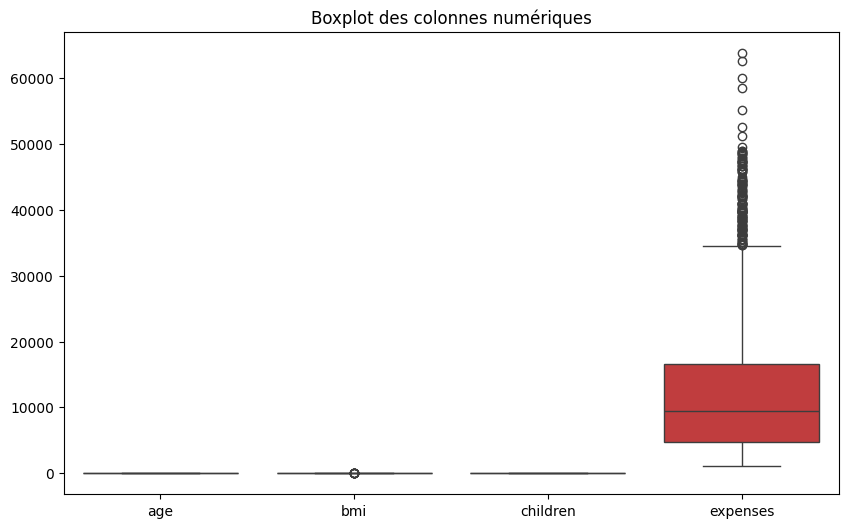

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Détection des valeurs aberrantes
def outlier_detect(df):
    for i in df.describe().columns:
        Q1 = df.describe().at['25%', i]
        Q3 = df.describe().at['75%', i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        x = np.array(df[i])
        p = [j for j in x if j < LTV or j > UTV]
        print('\\nValeurs aberrantes pour la colonne :', i, 'Nombre de valeurs aberrantes:', len(p))
        print(p)

outlier_detect(df[numeric_columns])

# Visualiser les valeurs aberrantes avec un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot des colonnes numériques')
plt.show()


D'après le **boxplot** et l'analyse des valeurs aberrantes :

- **Age et Children** : Il n'y a **aucune valeur aberrante** identifiée pour les colonnes 'age' et 'children', ce qui indique une distribution homogène.
- **BMI** : Il y a **9 valeurs aberrantes** (par exemple, 49.1, 48.1, etc.) pour l'indice de masse corporelle (BMI), ce qui montre la présence de certains individus ayant un BMI très élevé.
- **Expenses** : Les **frais médicaux** (expenses) contiennent **139 valeurs aberrantes**, avec des montants très élevés dépassant les 60 000 dollars, ce qui explique une **distribution fortement asymétrique**. Ces valeurs sont représentées par les points au-dessus de la boîte du boxplot.

### **7. Visualisation de la distribution des frais médicaux (`expenses`)**

**Question**: Quelle est la distribution des frais médicaux (`expenses`) ?

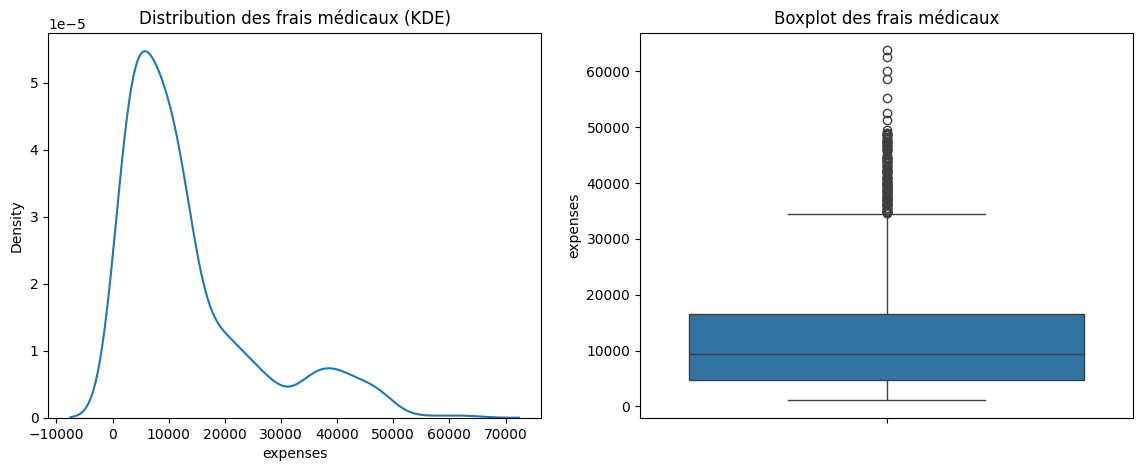

In [14]:
# Distribution des frais médicaux
f, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.kdeplot(df['expenses'], ax=axes[0])
sns.boxplot(df['expenses'], ax=axes[1])
axes[0].set_title('Distribution des frais médicaux (KDE)')
axes[1].set_title('Boxplot des frais médicaux')
plt.show()


D'après les graphiques de distribution des frais médicaux :

1. **Distribution des frais médicaux (KDE)** : La courbe de densité montre une distribution **asymétrique à droite**, ce qui signifie que la plupart des clients ont des frais médicaux inférieurs à environ **15 000**, avec quelques clients ayant des frais beaucoup plus élevés.
  
2. **Boxplot des frais médicaux** : Le boxplot montre de nombreuses **valeurs aberrantes** (points au-dessus de la boîte), ce qui confirme que certains clients ont des frais médicaux très élevés comparés à la majorité. Les frais médicaux varient considérablement entre les clients, avec une majorité de frais compris entre **5 000** et **15 000**, et quelques clients ayant des frais qui atteignent plus de **60 000**.

### **8. Corrélation entre les variables**

**Question**: Quelle est la corrélation entre les variables du jeu de données ?

               age       bmi  children  expenses
age       1.000000  0.109341  0.042469  0.299008
bmi       0.109341  1.000000  0.012645  0.198576
children  0.042469  0.012645  1.000000  0.067998
expenses  0.299008  0.198576  0.067998  1.000000


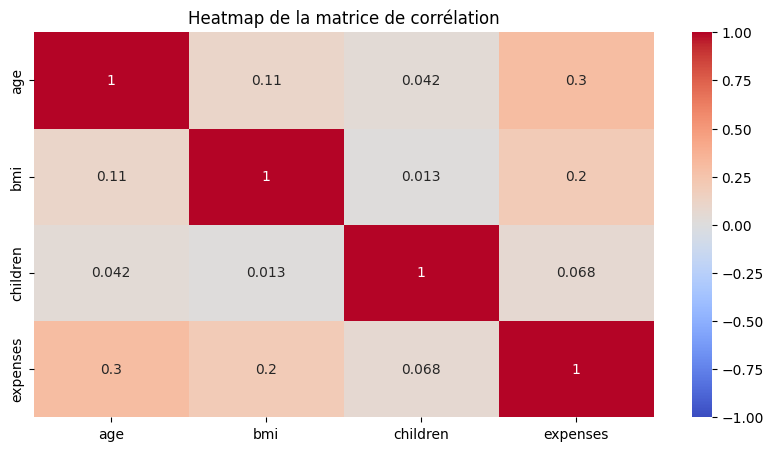

In [16]:
# Matrice de corrélation en excluant les colonnes non numériques
insur_corr = df.select_dtypes(include=['float64', 'int64']).corr()
print(insur_corr)

# Heatmap de la corrélation
plt.figure(figsize=(10, 5))
sns.heatmap(insur_corr, vmin=-1, vmax=1, center=0, annot=True, cmap="coolwarm")
plt.title('Heatmap de la matrice de corrélation')
plt.show()


Analyse de la Matrice de Corrélation
age et expenses ont une corrélation de 0.30, ce qui indique une corrélation positive modérée. Cela signifie que plus l'âge augmente, plus les frais médicaux ont tendance à augmenter.

bmi (indice de masse corporelle) et expenses ont une corrélation de 0.20, ce qui est une corrélation faible mais positive. Cela indique que les personnes avec un BMI plus élevé ont tendance à avoir des frais médicaux plus élevés.
children (nombre d'enfants) et expenses ont une corrélation très faible de 0.068, ce qui montre que le nombre d'enfants n'a pas d'impact significatif sur les dépenses médicales.

Les corrélations entre les autres variables (comme age avec bmi et children) sont également faibles, ce qui suggère qu'il n'y a pas de relations significatives entre ces variables.

### **9. Nettoyage des données - Duplication et renommage de colonnes**

**Question**: Y a-t-il des doublons dans les données et comment peut-on les supprimer ?

In [17]:
# Renommer la colonne 'sex' en 'gender'
df.rename(columns={'sex': 'gender'}, inplace=True)

# Vérifier les doublons
print("Nombre de doublons :", df.duplicated().sum())

# Supprimer les doublons
df = df.drop_duplicates()
print("Nombre de doublons après suppression :", df.duplicated().sum())


Nombre de doublons : 1
Nombre de doublons après suppression : 0


### **10. Préparation des données pour le modèle de régression**

**Question**: Comment préparer les données en utilisant l’encodage `one-hot` ou l’encodage `label` ?

In [19]:
categorical_columns = ['gender', 'smoker', 'region']

# One-hot encoding des colonnes catégorielles
one_hot = pd.get_dummies(df[categorical_columns])
insur_procsd_df = pd.concat([df[numeric_columns], one_hot], axis=1)
print("DataFrame après encodage One-Hot:")
print(insur_procsd_df.head())

# Encodage Label
label_encoder = LabelEncoder()
insur_procsd_df_label = df.copy()
for i in categorical_columns:
    insur_procsd_df_label[i] = label_encoder.fit_transform(insur_procsd_df_label[i])
print("DataFrame après encodage Label:")
print(insur_procsd_df_label.head())


DataFrame après encodage One-Hot:
   age   bmi  children  expenses  gender_female  gender_male  smoker_no  \
0   19  27.9         0  16884.92           True        False      False   
1   18  33.8         1   1725.55          False         True       True   
2   28  33.0         3   4449.46          False         True       True   
3   33  22.7         0  21984.47          False         True       True   
4   32  28.9         0   3866.86          False         True       True   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0        True             False             False             False   
1       False             False             False              True   
2       False             False             False              True   
3       False             False              True             False   
4       False             False              True             False   

   region_southwest  
0              True  
1             False  
2             False  


==> L'encodage One-Hot est idéal pour éviter l'ordre implicite entre les catégories, notamment avec des modèles linéaires, tandis que l'encodage Label attribue des valeurs numériques, utile pour des modèles comme les arbres de décision. Pour la régression linéaire, préférez l'encodage One-Hot.

### **11. Création et entraînement du modèle de régression linéaire**

**Question**: Comment entraîner un modèle de régression linéaire sur les données d’assurance ?

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Diviser les données en train et test
X = insur_procsd_df.drop(columns='expenses')
y = df[['expenses']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1234)

# Entraîner le modèle
model = LinearRegression()
model.fit(train_X, train_y)

# Afficher l'interception et les coefficients du modèle
print("Intercept du modèle :", model.intercept_)
print("Coefficients du modèle :", model.coef_)


Intercept du modèle : [-2.02804338]
Coefficients du modèle : [[   254.80507771    331.52281729    509.77181528    408.31872058
    -408.31872058 -12293.49435187  12293.49435187    689.79246289
      43.0935488    -452.55130361   -280.33470808]]


===> L'interception du modèle est de -2.03, et les coefficients indiquent l'impact de chaque variable explicative sur les frais médicaux (`expenses`). Les coefficients positifs, comme celui de l'âge (254.81), montrent une influence croissante, tandis que les coefficients négatifs, tels que celui des fumeurs (`smoker_no`), ont un impact réducteur sur les frais médicaux.

### **12. Évaluation du modèle**

**Question**: Comment évaluer les performances du modèle de régression linéaire ?

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prédire les valeurs pour le jeu de test et d'entraînement
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Calculer MAE, MSE, RMSE, R²
print("MAE Train :", mean_absolute_error(train_y, train_predict))
print("MAE Test :", mean_absolute_error(test_y, test_predict))
print("MSE Train :", mean_squared_error(train_y, train_predict))
print("MSE Test :", mean_squared_error(test_y, test_predict))
print("RMSE Train :", np.sqrt(mean_squared_error(train_y, train_predict)))
print("RMSE Test :", np.sqrt(mean_squared_error(test_y, test_predict)))
print("R² Train :", r2_score(train_y, train_predict))
print("R² Test :", r2_score(test_y, test_predict))


MAE Train : 4134.560205071928
MAE Test : 4230.685888666397
MSE Train : 37064299.82573061
MSE Test : 36067136.80464378
RMSE Train : 6088.04564911685
RMSE Test : 6005.59212772927
R² Train : 0.7508771595922443
R² Test : 0.7448469285923194


===> Les performances du modèle montrent que l'erreur absolue moyenne (MAE) et l'erreur quadratique moyenne (MSE) sont similaires pour les ensembles d'entraînement et de test, suggérant que le modèle généralise bien. Le R² autour de 0,75 indique que le modèle explique environ 75 % de la variance des frais médicaux.

### **13. Visualisation des résultats du modèle**

**Question**: Comment visualiser la relation entre les valeurs réelles et prédites pour les dépenses médicales ?

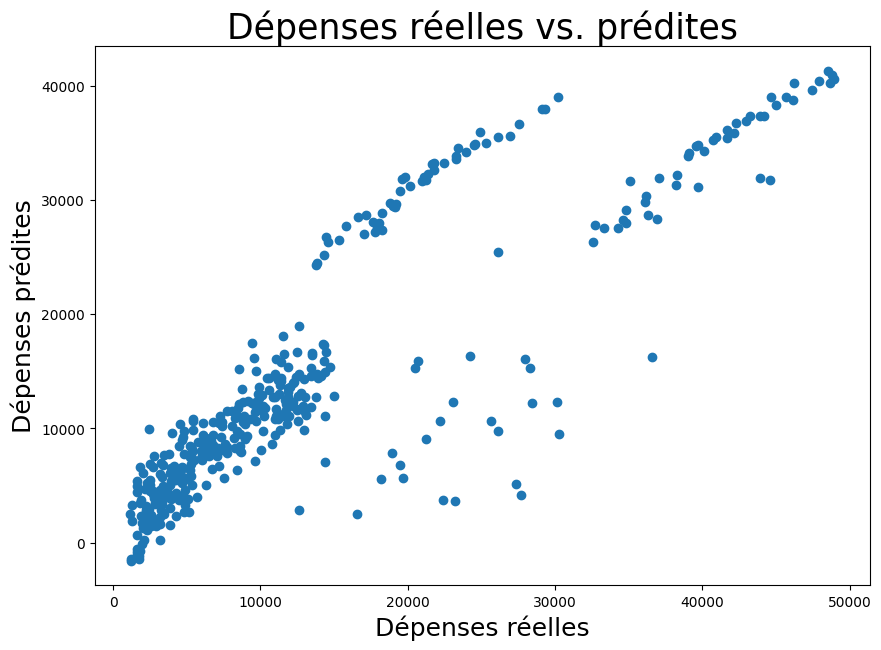

In [22]:
# Visualiser les valeurs réelles vs. prédites
plt.figure(figsize=(10, 7))
plt.title("Dépenses réelles vs. prédites", fontsize=25)
plt.xlabel("Dépenses réelles", fontsize=18)
plt.ylabel("Dépenses prédites", fontsize=18)
plt.scatter(x=test_y, y=test_predict)
plt.show()


===> Le graphique montre une corrélation positive entre les dépenses réelles et prédites, bien que la dispersion des points suggère une certaine variabilité dans les prédictions, notamment pour des valeurs de dépenses élevées. Cela signifie que le modèle fonctionne relativement bien, mais présente des imprécisions pour des dépenses élevées, indiquant des améliorations possibles.